In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import seaborn as sns


# Load the Boston Housing dataset
boston = fetch_openml(name='boston', version=1)

# Create a DataFrame
bos = pd.DataFrame(data=np.c_[boston['data'], boston['target']],
                   columns=np.append(boston['feature_names'], 'Price'))

In [120]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273.0,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [121]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  Price    506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [122]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  Price    506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [123]:
X = bos.drop('Price', axis=1)
y = bos['Price']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.4, random_state=42)

In [125]:
model = LinearRegression()

In [126]:
model.fit(X_train,y_train)

LinearRegression()

In [127]:
y_pred = model.predict(X_test)

In [128]:
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

In [129]:
print("Linear Regression model:")
print(f"Mean Squared Error: {mse_1}")
print(f"R2 Score: {r2_1}")

Linear Regression model:
Mean Squared Error: 21.832709989577562
R2 Score: 0.7125140936111206


In [130]:
ridge = Ridge(alpha =1.0)

In [131]:
ridge.fit(X_train,y_train)

Ridge()

In [132]:
y_pred = ridge.predict(X_test)

In [133]:
mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [134]:
print("Ridge Regression Model:")
print(f"Mean Squared Error: {mse_2}")
print(f"R2 Score: {r2_2}")

Ridge Regression Model:
Mean Squared Error: 22.432756182448518
R2 Score: 0.7046128837423021


In [135]:
lasso = Lasso(alpha=1.0)

In [136]:
lasso.fit(X_train,y_train)

Lasso()

In [137]:
y_pred = lasso.predict(X_test)

In [138]:
mse_3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)

In [139]:
print("Lasso Reggression Model:")
print(f"Mean Squared Error: {mse_3}")
print(f"R2 Score: {r2_3}")

Lasso Reggression Model:
Mean Squared Error: 25.88108600843476
R2 Score: 0.6592064167473799


In [140]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.50)

In [141]:
elastic_net.fit(X_train,y_train)

ElasticNet()

In [142]:
y_pred = elastic_net.predict(X_test)

In [143]:
mse_4 = mean_squared_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)

In [144]:
print("ElasticNet Reggression Model:")
print(f"Mean Squared Error: {mse_4}")
print(f"R2 Score: {r2_4}")

ElasticNet Reggression Model:
Mean Squared Error: 25.773711523898697
R2 Score: 0.660620288457517


In [145]:
model = DecisionTreeRegressor()

In [146]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [147]:
y_pred = model.predict(X_test)

In [148]:
mse_5 = mean_squared_error(y_test, y_pred)
r2_5 = r2_score(y_test, y_pred)

In [149]:
print("DecisionTreeReggressor Model:")
print(f"Mean Squared Error: {mse_5}")
print(f"R2 Score: {r2_5}")

DecisionTreeReggressor Model:
Mean Squared Error: 24.068768472906402
R2 Score: 0.6830704148316558


In [150]:
model = RandomForestRegressor(n_estimators=75,random_state=42)

In [151]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=75, random_state=42)

In [152]:
y_pred = model.predict(X_test)

In [153]:
mse_6 = mean_squared_error(y_test, y_pred)
r2_6 = r2_score(y_test, y_pred)

In [154]:
print("RandomForestReggressor Model:")
print(f"Mean Squared Error: {mse_6}")
print(f"R2 Score: {r2_6}")

RandomForestReggressor Model:
Mean Squared Error: 9.897102511220579
R2 Score: 0.8696782265041686


In [155]:
model = GradientBoostingRegressor(n_estimators=200,learning_rate=0.20,random_state=42)

In [156]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, random_state=42)

In [157]:
y_pred = model.predict(X_test)

In [158]:
mse_7 = mean_squared_error(y_test, y_pred)
r2_7 = r2_score(y_test, y_pred)

In [159]:
print("GradientBoostingReggressor Model:")
print(f"Mean Squared Error: {mse_7}")
print(f"R2 Score: {r2_7}")

GradientBoostingReggressor Model:
Mean Squared Error: 7.972854501174432
R2 Score: 0.8950160880682712


In [160]:
model = SVR(kernel='linear', C=70, gamma=0.1, epsilon=.1)

In [161]:
model.fit(X_train,y_train)

SVR(C=70, gamma=0.1, kernel='linear')

In [162]:
y_pred = model.predict(X_test)

In [163]:
mse_8 = mean_squared_error(y_test, y_pred)
r2_8 = r2_score(y_test, y_pred)

In [164]:
print("SVM Model:")
print(f"Mean Squared Error: {mse_8}")
print(f"R2 Score: {r2_8}")

SVM Model:
Mean Squared Error: 26.284684670305516
R2 Score: 0.6538919630134805


In [165]:
x_axis = ['Linear','Ridge','Lasso','ElasticNet','DT','RF','GBR','SVR']
mse_scores = [mse_1,mse_2,mse_3, mse_4, mse_5, mse_6,mse_7,mse_8]
r2_scores = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8]  

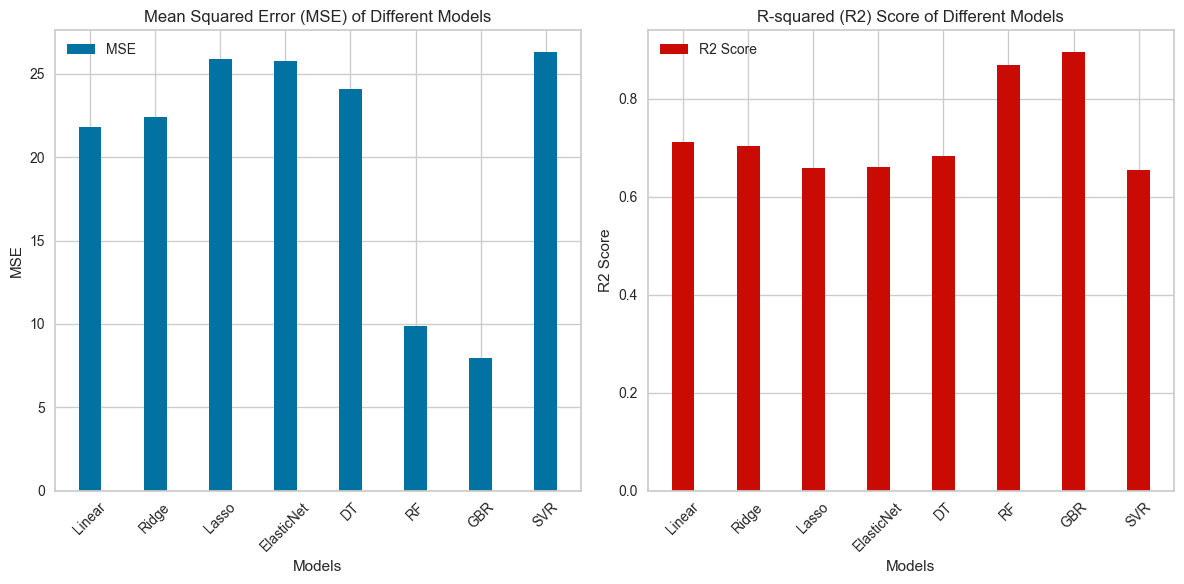

In [166]:
# Set up the bar plot
x = range(len(x_axis))
width = 0.35

# Create the bar plot for MSE scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x, mse_scores, width, label='MSE', color='b')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xticks(x, x_axis, rotation=45)
plt.legend()

# Create the bar plot for R2 scores
plt.subplot(1, 2, 2)
plt.bar(x, r2_scores, width, label='R2 Score', color='r')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R-squared (R2) Score of Different Models')
plt.xticks(x, x_axis, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [167]:
from pycaret.datasets import get_data
from pycaret.regression import *


In [168]:
bos_encoded = pd.get_dummies(bos, columns=['CHAS','RAD'])

In [169]:
bos_encoded = bos_encoded.astype('float')

In [170]:
# Create a dummy setup with your specific training data and target variable
dummy_setup = setup(data=bos_encoded, target='Price')


,Description,Value
0,Session id,5919
1,Target,Price
2,Target type,Regression
3,Original data shape,"(506, 23)"
4,Transformed data shape,"(506, 23)"
5,Transformed train set shape,"(354, 23)"
6,Transformed test set shape,"(152, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [171]:
models = ['lr', 'lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'ard', 'par', 'ransac', 'tr', 'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost']

Evaluating lr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7233,13.7508,3.7082,0.7748,0.2156,0.1742
1,3.2106,16.9936,4.1223,0.7893,0.1883,0.1474
2,2.6148,10.8740,3.2976,0.7301,0.1539,0.1324
3,3.0722,18.5605,4.3082,0.6881,0.4162,0.1712
4,4.0163,45.0797,6.7141,0.4581,0.3410,0.1915
5,3.8499,28.4145,5.3305,0.6944,0.4110,0.1804
6,3.1055,12.9553,3.5993,0.8098,0.2020,0.1891
7,3.4024,20.2606,4.5012,0.6249,0.2752,0.1894
8,4.2401,39.6264,6.2950,0.6584,0.2454,0.1631


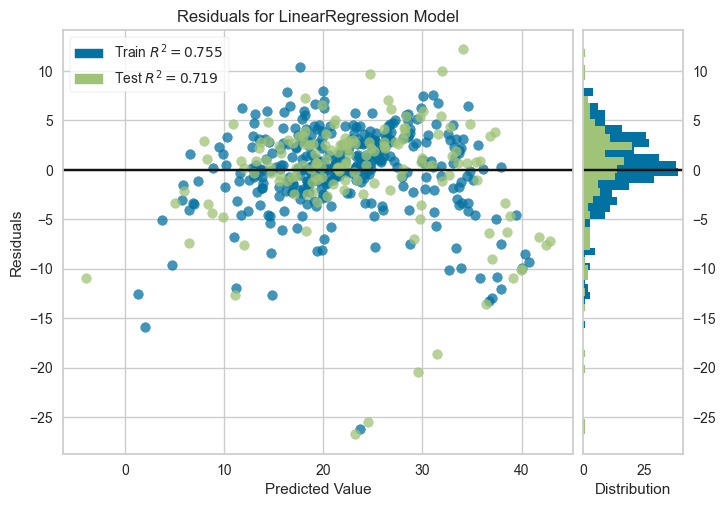

Evaluating lasso model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1553,15.0123,3.8746,0.7542,0.1963,0.1744
1,4.0916,27.7611,5.2689,0.6558,0.2230,0.1797
2,2.9680,14.7308,3.8381,0.6344,0.1783,0.1469
3,3.5016,23.9679,4.8957,0.5972,0.4548,0.1785
4,4.0957,39.1035,6.2533,0.5299,0.2622,0.1945
5,4.2021,44.3220,6.6575,0.5233,0.4487,0.1842
6,3.7902,19.0478,4.3644,0.7204,0.2245,0.2188
7,3.3297,22.9675,4.7924,0.5748,0.2940,0.1878
8,5.0124,55.1173,7.4241,0.5249,0.2247,0.1774


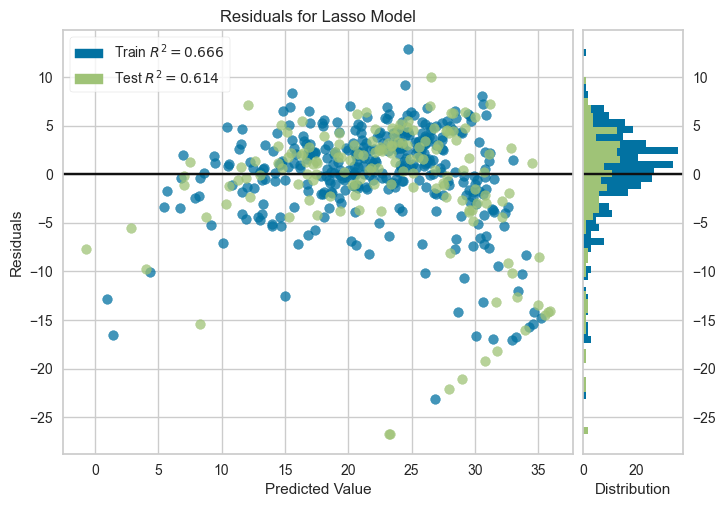

Evaluating ridge model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5980,12.8437,3.5838,0.7897,0.2092,0.1675
1,3.2089,16.9231,4.1138,0.7902,0.1924,0.1507
2,2.5901,11.1490,3.3390,0.7233,0.1573,0.1320
3,3.1214,19.4060,4.4052,0.6738,0.4794,0.1747
4,4.0985,46.4725,6.8171,0.4413,0.3527,0.1967
5,3.7773,27.9248,5.2844,0.6997,0.5228,0.1771
6,3.2605,13.5385,3.6795,0.8013,0.2066,0.1987
7,3.2248,18.9911,4.3579,0.6484,0.2789,0.1816
8,4.2227,40.5455,6.3675,0.6505,0.2409,0.1601


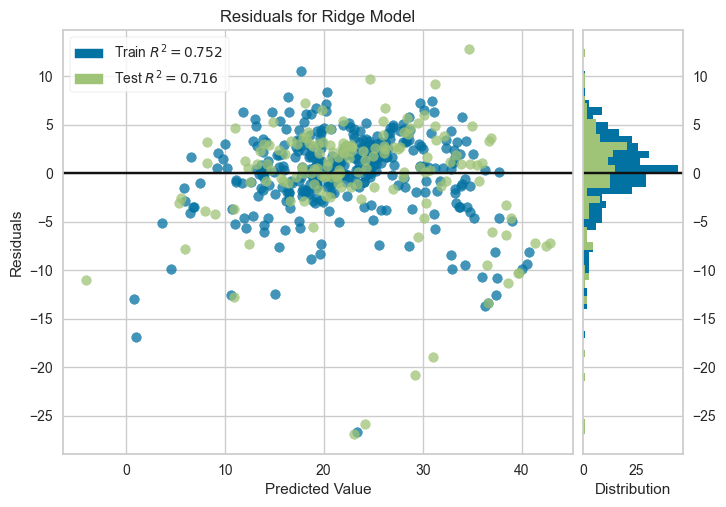

Evaluating en model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0198,14.2606,3.7763,0.7665,0.1939,0.1689
1,4.0216,26.3729,5.1355,0.6730,0.2213,0.1782
2,2.9011,14.1670,3.7639,0.6484,0.1753,0.1437
3,3.5488,24.0418,4.9032,0.5959,0.4269,0.1804
4,4.0506,37.2081,6.0998,0.5527,0.2511,0.1920
5,4.0762,40.0425,6.3279,0.5693,0.4560,0.1806
6,3.7257,18.3160,4.2797,0.7311,0.2211,0.2160
7,3.3362,23.1682,4.8133,0.5711,0.2950,0.1885
8,4.8849,53.1281,7.2889,0.5420,0.2188,0.1699


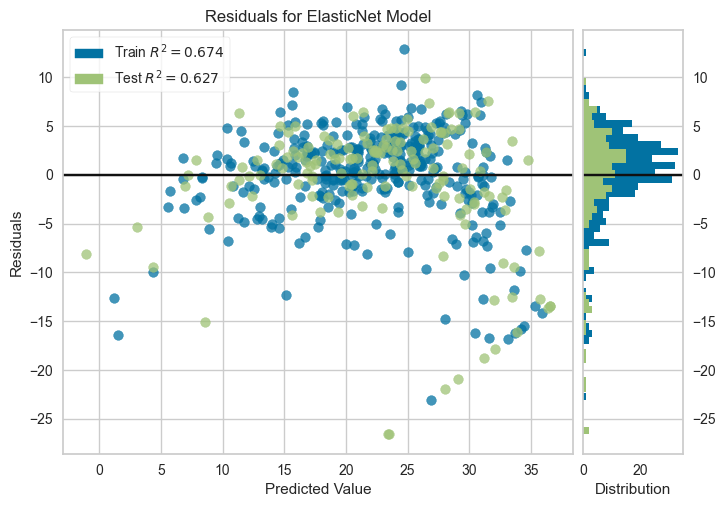

Evaluating lar model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6727,13.3299,3.6510,0.7817,0.2072,0.1673
1,3.5339,19.8287,4.4529,0.7541,0.2162,0.1649
2,2.8629,12.5388,3.5410,0.6888,0.1769,0.1489
3,3.2530,21.2008,4.6044,0.6437,0.3736,0.1735
4,4.0138,37.9687,6.1619,0.5435,0.3402,0.1982
5,4.7371,37.9171,6.1577,0.5922,0.3765,0.2258
6,3.2255,13.6730,3.6977,0.7993,0.2020,0.1895
7,3.8295,25.9879,5.0978,0.5189,0.3714,0.2122
8,4.0956,33.9635,5.8278,0.7072,0.2051,0.1569


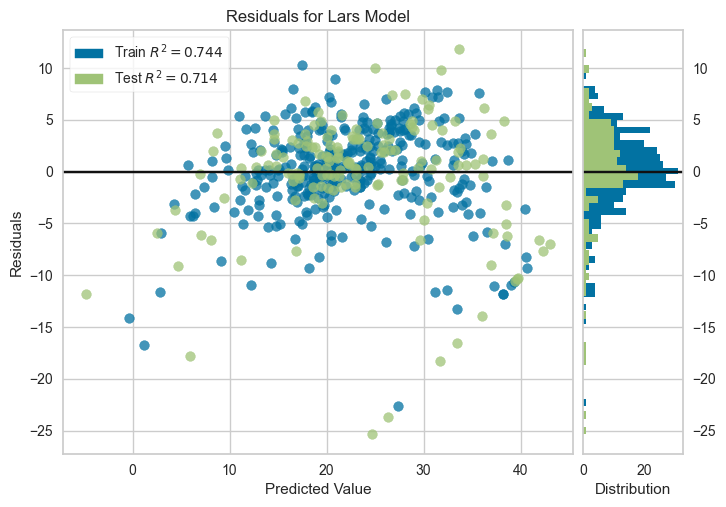

Evaluating llar model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1552,15.0123,3.8746,0.7542,0.1963,0.1744
1,4.0916,27.7607,5.2688,0.6558,0.2230,0.1797
2,2.9680,14.7302,3.8380,0.6344,0.1783,0.1469
3,3.5017,23.9676,4.8957,0.5972,0.4548,0.1785
4,4.0956,39.1020,6.2532,0.5299,0.2621,0.1945
5,4.2022,44.3230,6.6576,0.5233,0.4487,0.1842
6,3.7902,19.0473,4.3643,0.7204,0.2245,0.2188
7,3.3297,22.9678,4.7925,0.5748,0.2940,0.1878
8,5.0125,55.1186,7.4242,0.5249,0.2247,0.1773


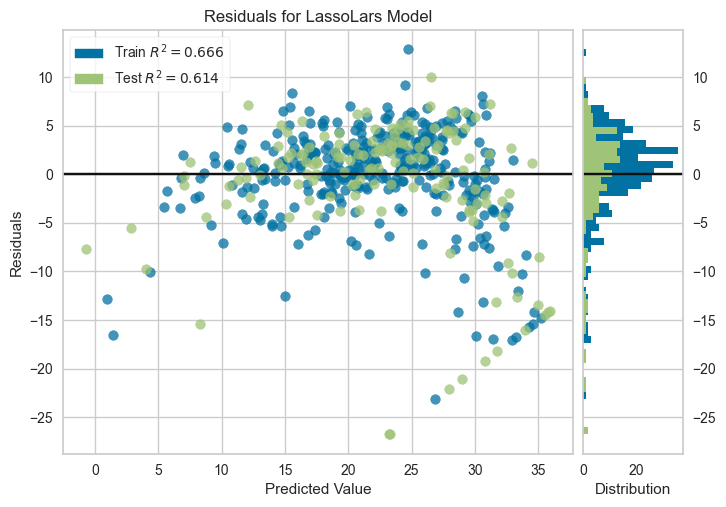

Evaluating omp model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0123,39.0485,6.2489,0.3606,0.2808,0.2615
1,5.1928,53.7562,7.3319,0.3334,0.2740,0.2332
2,5.4677,43.8540,6.6222,-0.0884,0.3038,0.2763
3,5.1596,44.6524,6.6822,0.2495,0.3193,0.3146
4,5.9119,73.2133,8.5565,0.1198,0.3333,0.2673
5,5.8224,72.2165,8.4980,0.2233,0.3324,0.2836
6,5.0577,35.8694,5.9891,0.4734,0.2857,0.2785
7,4.5548,35.1625,5.9298,0.3490,0.2812,0.2645
8,7.4180,114.5296,10.7019,0.0128,0.3561,0.2703


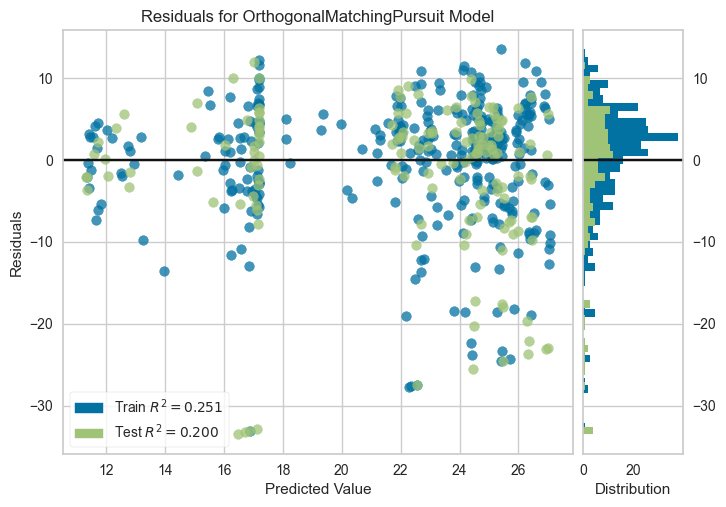

Evaluating br model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3892,11.9719,3.4600,0.8040,0.2020,0.1568
1,3.4170,18.5935,4.3120,0.7694,0.2059,0.1625
2,2.5698,11.3407,3.3676,0.7185,0.1596,0.1312
3,3.2512,20.7650,4.5569,0.6510,0.4180,0.1796
4,4.2195,47.1998,6.8702,0.4326,0.3516,0.2036
5,3.6396,28.1548,5.3061,0.6972,0.4288,0.1695
6,3.4016,14.5891,3.8196,0.7858,0.2138,0.2075
7,3.1394,18.9576,4.3540,0.6490,0.2851,0.1789
8,4.2971,42.0925,6.4879,0.6372,0.2265,0.1594


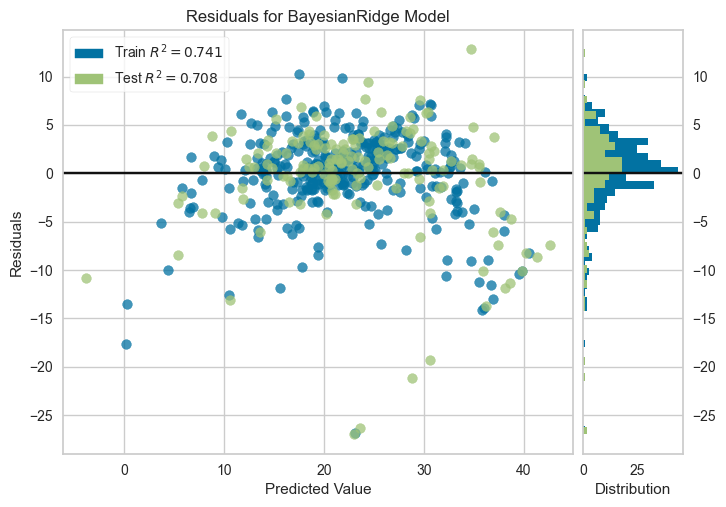

Evaluating ard model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7608,13.5555,3.6818,0.7780,0.2203,0.1832
1,3.4311,18.7060,4.3250,0.7681,0.2030,0.1564
2,2.6561,10.7866,3.2843,0.7323,0.1678,0.1381
3,3.1527,19.9186,4.4630,0.6652,0.3572,0.1800
4,4.0613,44.8590,6.6977,0.4607,0.3372,0.1917
5,3.6832,25.7929,5.0787,0.7226,0.3167,0.1710
6,3.5548,16.2558,4.0319,0.7614,0.2427,0.2295
7,3.3308,20.0828,4.4814,0.6282,0.2890,0.1867
8,4.2165,39.2360,6.2639,0.6618,0.2230,0.1583


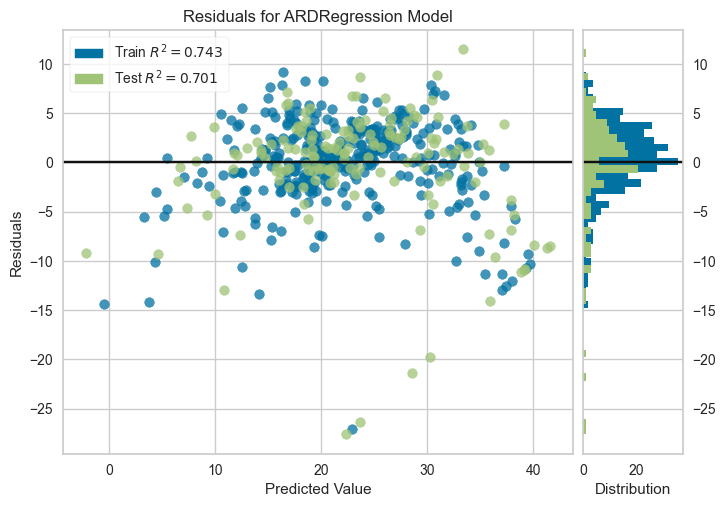

Evaluating par model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.4487,46.9326,6.8507,0.2314,0.4664,0.3198
1,27.0432,866.4029,29.4347,-9.7432,0.8906,1.4975
2,29.1535,915.9083,30.2640,-21.7317,0.9127,1.5835
3,5.0453,53.6222,7.3227,0.0988,0.3405,0.2857
4,5.8257,60.3658,7.7695,0.2743,0.3371,0.2838
5,7.0583,106.0746,10.2993,-0.1409,0.5653,0.3046
6,9.2779,125.9425,11.2224,-0.8488,0.5182,0.6411
7,9.0961,111.9313,10.5798,-1.0722,0.6876,0.4431
8,7.4980,98.1730,9.9082,0.1538,0.3822,0.3067


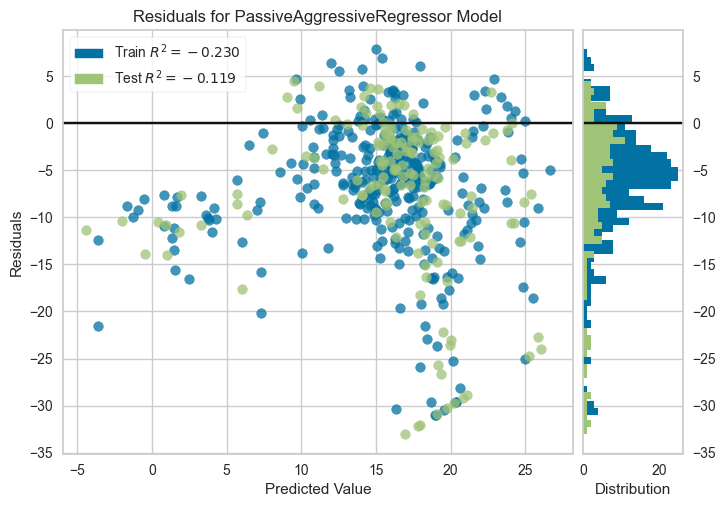

Evaluating ransac model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0542,16.8948,4.1103,0.7233,0.2402,0.1912
1,3.8305,32.7730,5.7248,0.5936,0.2046,0.1480
2,2.8509,16.0193,4.0024,0.6024,0.1712,0.1292
3,3.1108,17.2730,4.1561,0.7097,0.3138,0.1874
4,4.7882,72.5823,8.5195,0.1274,0.5712,0.2292
5,3.8694,37.0095,6.0835,0.6019,0.5316,0.2102
6,3.4701,20.7191,4.5518,0.6958,0.2092,0.1833
7,2.2267,9.8736,3.1422,0.8172,0.1590,0.1246
8,6.3240,79.2292,8.9011,0.3171,0.2853,0.2473


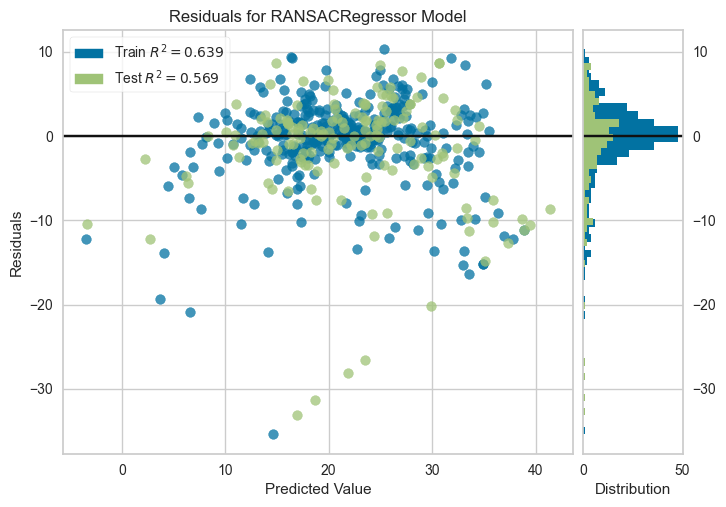

Evaluating tr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6089,12.6061,3.5505,0.7936,0.2027,0.1623
1,3.4674,21.3673,4.6225,0.7351,0.2228,0.1530
2,2.5346,10.1770,3.1901,0.7474,0.1598,0.1266
3,3.3443,23.6202,4.8601,0.6030,0.4346,0.1883
4,4.2071,50.0659,7.0757,0.3981,0.4131,0.2008
5,3.4228,26.4894,5.1468,0.7151,0.4353,0.1610
6,3.0439,12.8084,3.5789,0.8120,0.2170,0.1929
7,3.1461,17.6306,4.1989,0.6736,0.2557,0.1753
8,4.9891,56.1653,7.4943,0.5159,0.2967,0.1994


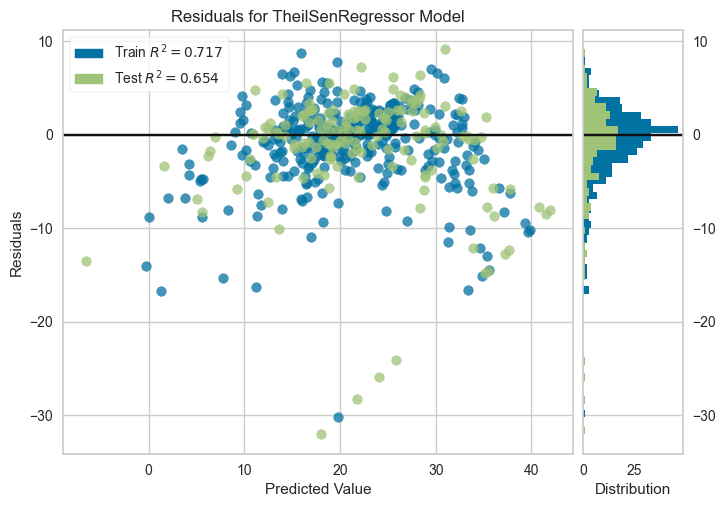

Evaluating huber model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6685,13.1579,3.6274,0.7845,0.1931,0.1573
1,3.4122,21.2763,4.6126,0.7362,0.2209,0.1615
2,2.4223,9.5778,3.0948,0.7623,0.1540,0.1237
3,3.4331,19.9536,4.4669,0.6646,0.4219,0.2005
4,4.5256,60.3856,7.7708,0.2741,0.5159,0.2183
5,3.5457,29.0609,5.3908,0.6874,0.4399,0.1582
6,3.5557,18.3451,4.2831,0.7307,0.2082,0.1901
7,3.4131,21.4900,4.6357,0.6022,0.2739,0.2038
8,4.9246,53.2601,7.2980,0.5409,0.3280,0.1860


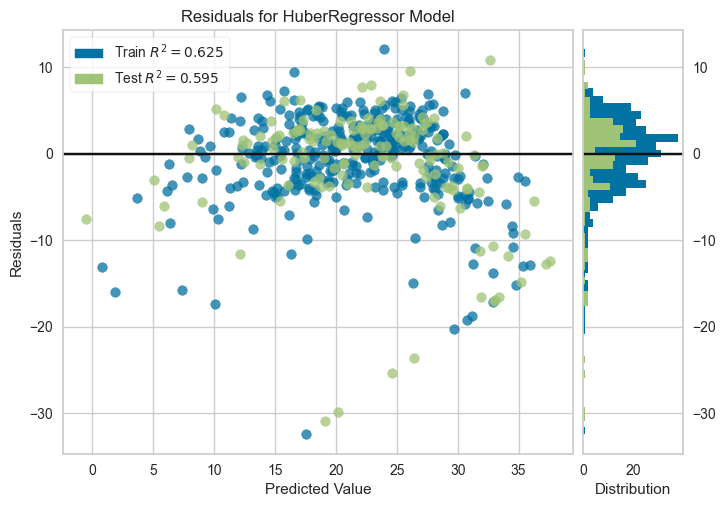

Evaluating kr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6179,14.6220,3.8239,0.7606,0.2219,0.1736
1,3.3137,17.9453,4.2362,0.7775,0.2150,0.1673
2,2.5143,10.1255,3.1821,0.7487,0.1585,0.1321
3,3.5124,22.4814,4.7415,0.6222,0.4113,0.2105
4,4.3742,57.5238,7.5844,0.3085,0.4929,0.2167
5,3.5385,28.2427,5.3144,0.6962,0.3023,0.1720
6,3.6775,18.3580,4.2846,0.7305,0.2524,0.2464
7,3.1362,17.3376,4.1638,0.6790,0.2577,0.1936
8,4.5563,51.5670,7.1810,0.5555,0.3369,0.1699


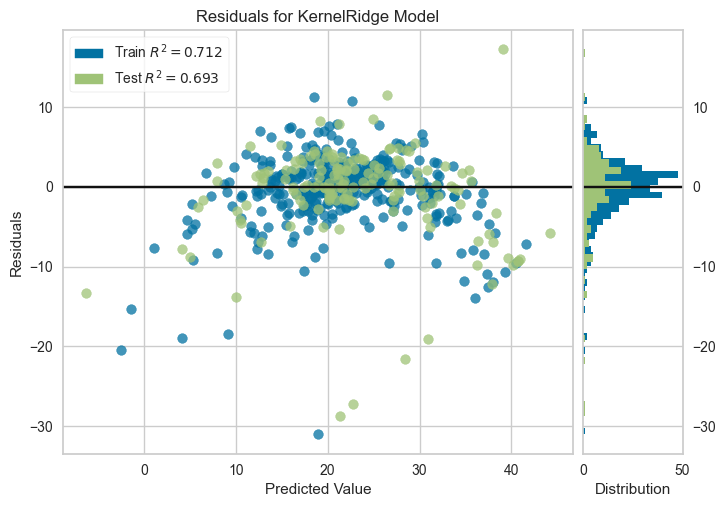

Evaluating svm model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.7683,41.4095,6.4350,0.3219,0.2856,0.2427
1,5.2854,61.0605,7.8141,0.2429,0.2785,0.2143
2,4.7698,39.8258,6.3108,0.0116,0.2861,0.2285
3,3.9893,39.0527,6.2492,0.3436,0.2963,0.2476
4,5.7075,76.2134,8.7300,0.0838,0.3280,0.2395
5,5.4541,76.0211,8.7190,0.1823,0.3222,0.2436
6,4.6029,38.1588,6.1773,0.4398,0.2860,0.2504
7,4.1307,32.1574,5.6707,0.4047,0.2600,0.2280
8,7.4040,128.2705,11.3257,-0.1057,0.3796,0.2545


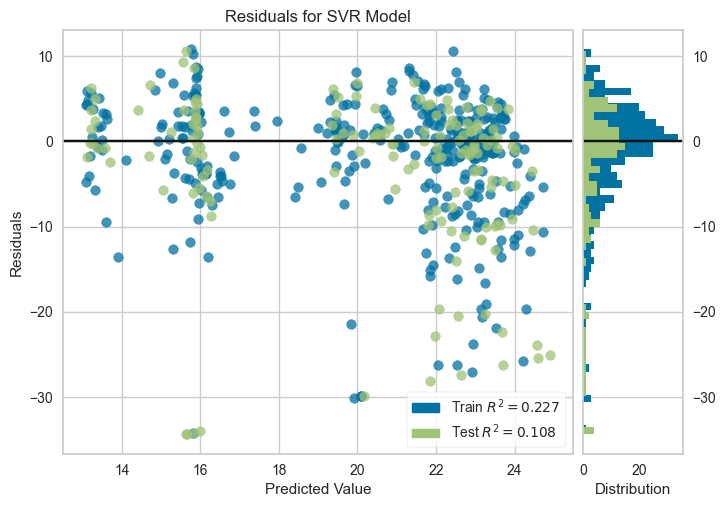

Evaluating knn model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5100,19.8309,4.4532,0.6753,0.1951,0.1784
1,3.8717,30.8356,5.5530,0.6176,0.2022,0.1616
2,3.8672,27.5796,5.2516,0.3155,0.2244,0.1823
3,3.3206,27.6897,5.2621,0.5346,0.2207,0.1771
4,5.3177,67.1482,8.1944,0.1928,0.3115,0.2381
5,5.3720,72.0435,8.4878,0.2251,0.3041,0.2338
6,3.9851,27.7683,5.2696,0.5924,0.2580,0.2357
7,2.5377,15.9705,3.9963,0.7043,0.1831,0.1420
8,6.2623,94.3549,9.7136,0.1867,0.3104,0.2153


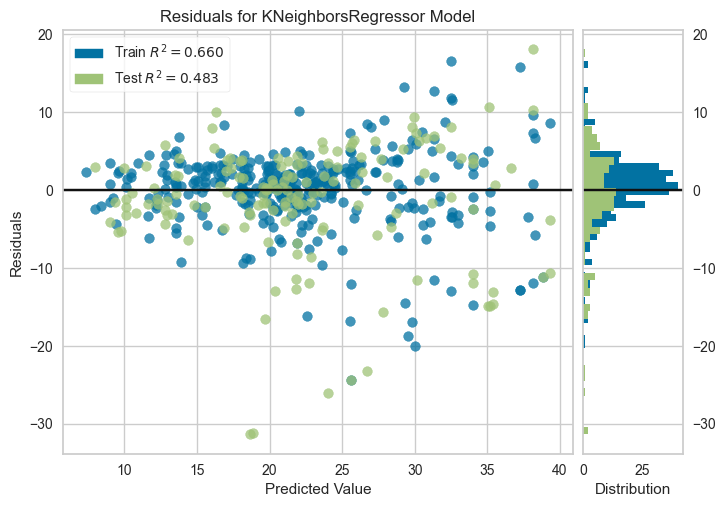

Evaluating dt model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5722,13.1572,3.6273,0.7845,0.1609,0.1270
1,3.2028,15.2603,3.9064,0.8108,0.1750,0.1539
2,2.7944,13.5589,3.6822,0.6635,0.1881,0.1399
3,2.7528,13.4136,3.6625,0.7746,0.1803,0.1557
4,4.0029,42.5957,6.5265,0.4879,0.2960,0.2004
5,3.1371,19.3709,4.4012,0.7917,0.1653,0.1352
6,2.7971,12.8043,3.5783,0.8120,0.2243,0.1697
7,2.9171,12.5300,3.5398,0.7680,0.1758,0.1638
8,3.6571,27.3360,5.2284,0.7644,0.1899,0.1560


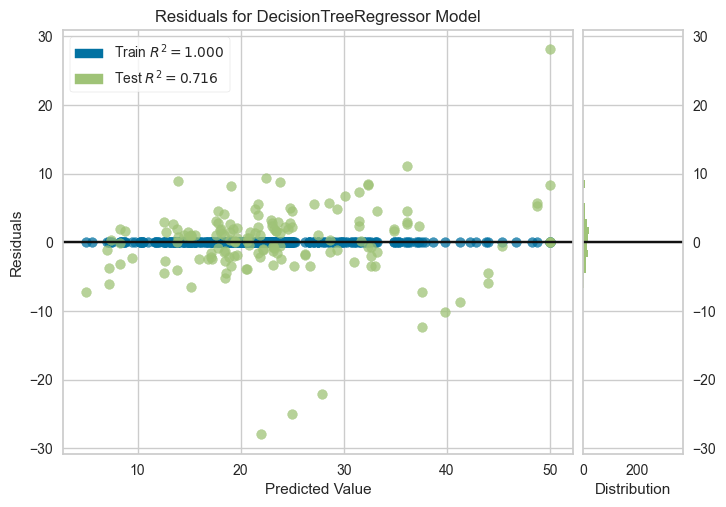

Evaluating rf model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1640,8.7691,2.9613,0.8564,0.1438,0.1176
1,1.9709,6.1562,2.4812,0.9237,0.1102,0.0919
2,2.0333,9.7525,3.1229,0.7580,0.1444,0.0970
3,1.8091,5.3189,2.3063,0.9106,0.1357,0.1118
4,2.6077,24.7784,4.9778,0.7021,0.1791,0.1160
5,2.2953,10.3238,3.2131,0.8890,0.1328,0.1073
6,2.7255,11.9379,3.4551,0.8248,0.2055,0.1705
7,2.2192,8.3658,2.8924,0.8451,0.1675,0.1367
8,2.9259,15.3288,3.9152,0.8679,0.1369,0.1139


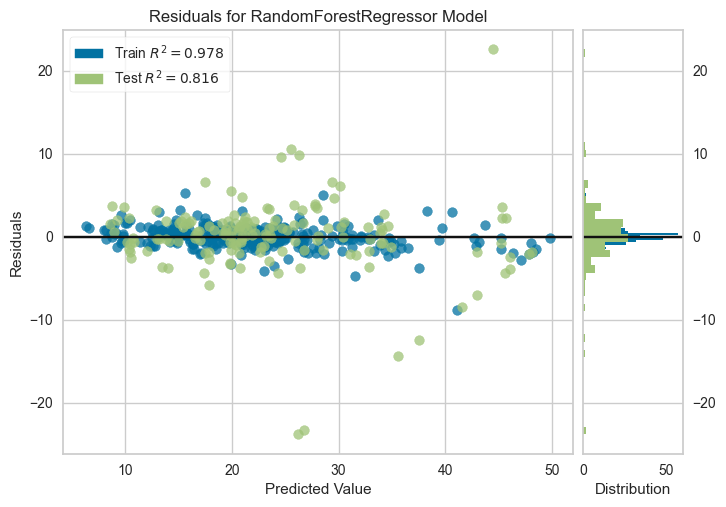

Evaluating et model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0325,6.8970,2.6262,0.8871,0.1388,0.1146
1,1.8896,6.1247,2.4748,0.9241,0.1035,0.0868
2,2.0276,10.0339,3.1676,0.7510,0.1549,0.1029
3,1.2803,2.6624,1.6317,0.9553,0.1016,0.0816
4,2.5454,22.8243,4.7775,0.7256,0.1703,0.1118
5,2.4392,10.6197,3.2588,0.8858,0.1347,0.1145
6,2.4805,9.9295,3.1511,0.8542,0.1841,0.1507
7,1.9861,5.8743,2.4237,0.8913,0.1336,0.1158
8,3.1170,18.6290,4.3161,0.8394,0.1522,0.1216


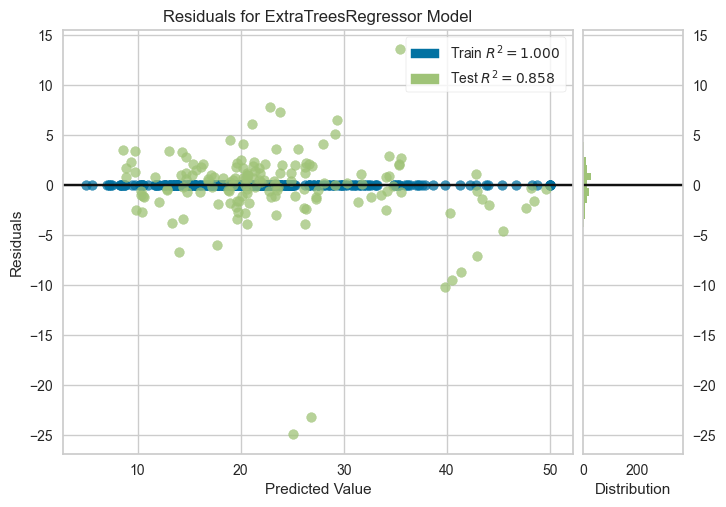

Evaluating gbr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0126,7.0296,2.6513,0.8849,0.1411,0.1153
1,2.0341,6.6711,2.5828,0.9173,0.1235,0.0986
2,2.2819,11.1544,3.3398,0.7232,0.1587,0.1117
3,1.6613,3.7473,1.9358,0.9370,0.1180,0.0990
4,2.9254,22.6203,4.7561,0.7281,0.1840,0.1392
5,2.5564,11.1580,3.3404,0.8800,0.1495,0.1228
6,2.3641,10.8200,3.2894,0.8412,0.1954,0.1463
7,2.3311,8.7855,2.9640,0.8374,0.1711,0.1413
8,2.7072,13.4424,3.6664,0.8841,0.1336,0.1077


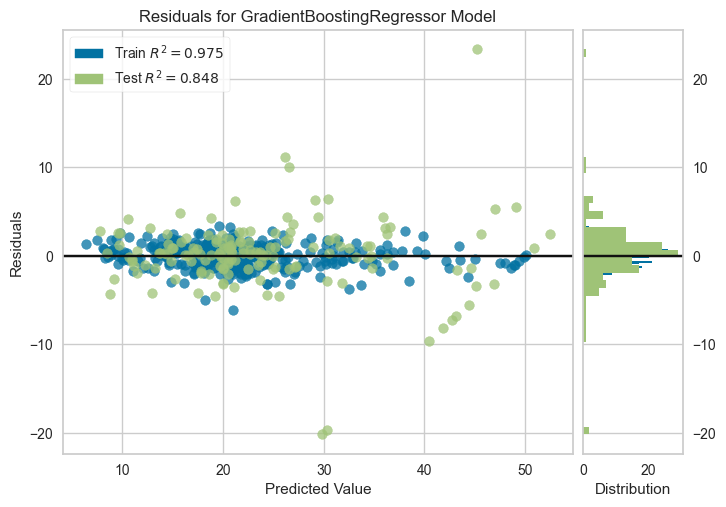

Evaluating xgboost model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6953,6.4774,2.5451,0.8939,0.1335,0.0969
1,2.4613,9.6822,3.1116,0.8799,0.1302,0.1153
2,2.4370,13.7521,3.7084,0.6587,0.1696,0.1181
3,1.7227,6.3702,2.5239,0.8929,0.1258,0.0977
4,3.0703,27.9191,5.2839,0.6644,0.1939,0.1382
5,2.1726,10.5985,3.2555,0.8860,0.1218,0.0966
6,2.6076,12.2342,3.4977,0.8204,0.2051,0.1620
7,2.5730,12.4582,3.5296,0.7694,0.1757,0.1476
8,3.4449,23.3812,4.8354,0.7985,0.1604,0.1298


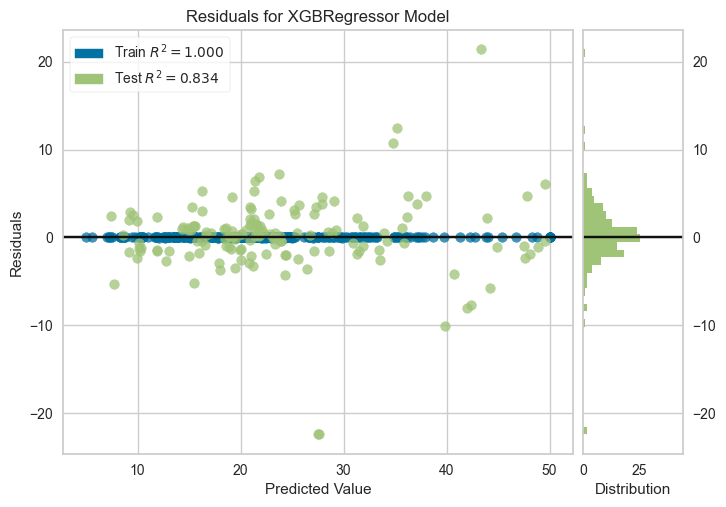

Evaluating lightgbm model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3922,10.1044,3.1787,0.8345,0.1430,0.1208
1,2.1583,6.8736,2.6218,0.9148,0.1250,0.0981
2,2.2391,10.6944,3.2702,0.7346,0.1486,0.1076
3,1.7386,4.7880,2.1881,0.9195,0.1367,0.1079
4,2.4383,17.9880,4.2412,0.7837,0.1621,0.1124
5,2.5001,15.4670,3.9328,0.8336,0.1310,0.1075
6,2.5435,12.2087,3.4941,0.8208,0.1990,0.1508
7,2.7912,14.1013,3.7552,0.7389,0.1773,0.1542
8,2.5298,13.1712,3.6292,0.8865,0.1260,0.0943


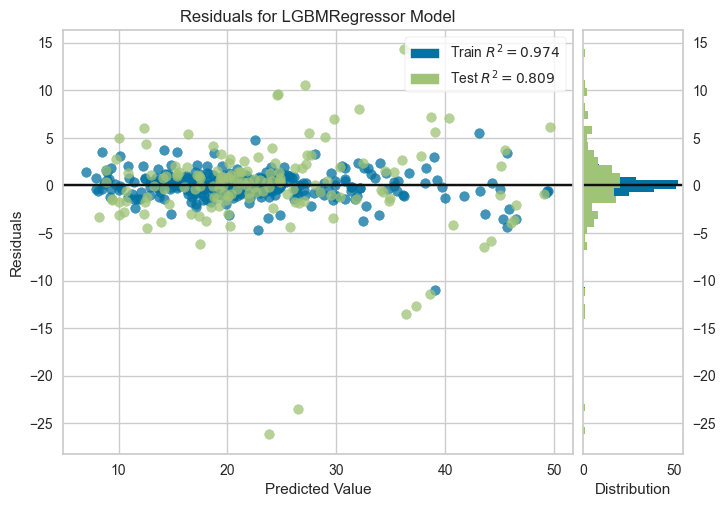

Evaluating catboost model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8951,6.1021,2.4702,0.9001,0.1402,0.1139
1,1.7953,6.5450,2.5583,0.9188,0.1079,0.0828
2,1.8116,8.9694,2.9949,0.7774,0.1384,0.0858
3,1.0974,1.9428,1.3938,0.9673,0.0842,0.0644
4,2.4693,22.1455,4.7059,0.7338,0.1801,0.1181
5,2.3309,10.7846,3.2840,0.8840,0.1329,0.1061
6,2.1879,8.6916,2.9481,0.8724,0.1798,0.1372
7,2.1618,7.1627,2.6763,0.8674,0.1495,0.1262
8,3.1410,22.0988,4.7009,0.8095,0.1407,0.1122


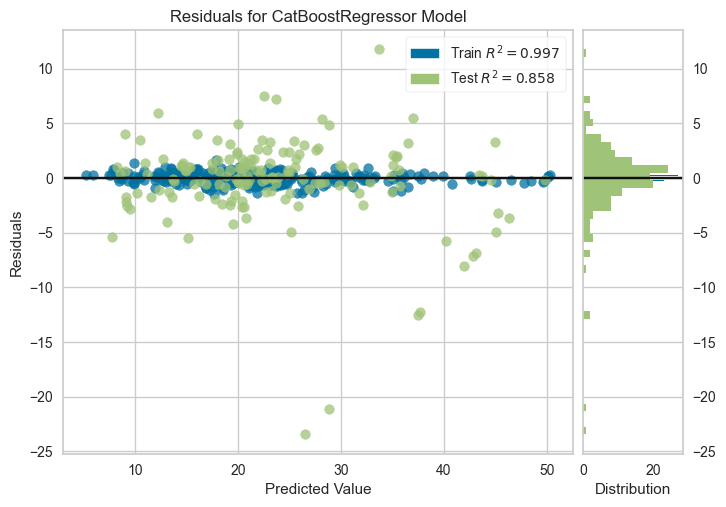

In [172]:
for model in models:
    print(f"Evaluating {model} model")
    model = create_model(model)
    
    # Plot the results
    plot_model(model, plot='residuals')

In [173]:
trained_models = []
r2_scores = []
mse_scores = []
model_names = []

In [174]:
for col in bos.columns:
    if bos[col].dtype == 'object':
        bos[col] = pd.to_numeric(bos[col], errors='coerce')

In [175]:
bos_encoded = pd.get_dummies(bos, columns=['CHAS','RAD'])

In [176]:
bos_encoded

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,...,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,...,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,...,0,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,...,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,...,0,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,...,0,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,...,0,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,...,0,1,0,0,0,0,0,0,0,0


In [177]:
X = bos_encoded.drop(['Price'], axis=1)
y = bos_encoded['Price']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [179]:
models = ['lr', 'lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'ard', 'par', 'ransac', 'tr', 'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm']


In [180]:
for model_name in models:
    print(f"Evaluating {model_name} model")
    model = create_model(model_name)
    model.fit(X_train, y_train)
    trained_models.append(model)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)
    model_names.append(model_name)

Evaluating lr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7233,13.7508,3.7082,0.7748,0.2156,0.1742
1,3.2106,16.9936,4.1223,0.7893,0.1883,0.1474
2,2.6148,10.8740,3.2976,0.7301,0.1539,0.1324
3,3.0722,18.5605,4.3082,0.6881,0.4162,0.1712
4,4.0163,45.0797,6.7141,0.4581,0.3410,0.1915
5,3.8499,28.4145,5.3305,0.6944,0.4110,0.1804
6,3.1055,12.9553,3.5993,0.8098,0.2020,0.1891
7,3.4024,20.2606,4.5012,0.6249,0.2752,0.1894
8,4.2401,39.6264,6.2950,0.6584,0.2454,0.1631


Evaluating lasso model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1553,15.0123,3.8746,0.7542,0.1963,0.1744
1,4.0916,27.7611,5.2689,0.6558,0.2230,0.1797
2,2.9680,14.7308,3.8381,0.6344,0.1783,0.1469
3,3.5016,23.9679,4.8957,0.5972,0.4548,0.1785
4,4.0957,39.1035,6.2533,0.5299,0.2622,0.1945
5,4.2021,44.3220,6.6575,0.5233,0.4487,0.1842
6,3.7902,19.0478,4.3644,0.7204,0.2245,0.2188
7,3.3297,22.9675,4.7924,0.5748,0.2940,0.1878
8,5.0124,55.1173,7.4241,0.5249,0.2247,0.1774


Evaluating ridge model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5980,12.8437,3.5838,0.7897,0.2092,0.1675
1,3.2089,16.9231,4.1138,0.7902,0.1924,0.1507
2,2.5901,11.1490,3.3390,0.7233,0.1573,0.1320
3,3.1214,19.4060,4.4052,0.6738,0.4794,0.1747
4,4.0985,46.4725,6.8171,0.4413,0.3527,0.1967
5,3.7773,27.9248,5.2844,0.6997,0.5228,0.1771
6,3.2605,13.5385,3.6795,0.8013,0.2066,0.1987
7,3.2248,18.9911,4.3579,0.6484,0.2789,0.1816
8,4.2227,40.5455,6.3675,0.6505,0.2409,0.1601


Evaluating en model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0198,14.2606,3.7763,0.7665,0.1939,0.1689
1,4.0216,26.3729,5.1355,0.6730,0.2213,0.1782
2,2.9011,14.1670,3.7639,0.6484,0.1753,0.1437
3,3.5488,24.0418,4.9032,0.5959,0.4269,0.1804
4,4.0506,37.2081,6.0998,0.5527,0.2511,0.1920
5,4.0762,40.0425,6.3279,0.5693,0.4560,0.1806
6,3.7257,18.3160,4.2797,0.7311,0.2211,0.2160
7,3.3362,23.1682,4.8133,0.5711,0.2950,0.1885
8,4.8849,53.1281,7.2889,0.5420,0.2188,0.1699


Evaluating lar model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6727,13.3299,3.6510,0.7817,0.2072,0.1673
1,3.5339,19.8287,4.4529,0.7541,0.2162,0.1649
2,2.8629,12.5388,3.5410,0.6888,0.1769,0.1489
3,3.2530,21.2008,4.6044,0.6437,0.3736,0.1735
4,4.0138,37.9687,6.1619,0.5435,0.3402,0.1982
5,4.7371,37.9171,6.1577,0.5922,0.3765,0.2258
6,3.2255,13.6730,3.6977,0.7993,0.2020,0.1895
7,3.8295,25.9879,5.0978,0.5189,0.3714,0.2122
8,4.0956,33.9635,5.8278,0.7072,0.2051,0.1569


Evaluating llar model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1552,15.0123,3.8746,0.7542,0.1963,0.1744
1,4.0916,27.7607,5.2688,0.6558,0.2230,0.1797
2,2.9680,14.7302,3.8380,0.6344,0.1783,0.1469
3,3.5017,23.9676,4.8957,0.5972,0.4548,0.1785
4,4.0956,39.1020,6.2532,0.5299,0.2621,0.1945
5,4.2022,44.3230,6.6576,0.5233,0.4487,0.1842
6,3.7902,19.0473,4.3643,0.7204,0.2245,0.2188
7,3.3297,22.9678,4.7925,0.5748,0.2940,0.1878
8,5.0125,55.1186,7.4242,0.5249,0.2247,0.1773


Evaluating omp model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0123,39.0485,6.2489,0.3606,0.2808,0.2615
1,5.1928,53.7562,7.3319,0.3334,0.2740,0.2332
2,5.4677,43.8540,6.6222,-0.0884,0.3038,0.2763
3,5.1596,44.6524,6.6822,0.2495,0.3193,0.3146
4,5.9119,73.2133,8.5565,0.1198,0.3333,0.2673
5,5.8224,72.2165,8.4980,0.2233,0.3324,0.2836
6,5.0577,35.8694,5.9891,0.4734,0.2857,0.2785
7,4.5548,35.1625,5.9298,0.3490,0.2812,0.2645
8,7.4180,114.5296,10.7019,0.0128,0.3561,0.2703


Evaluating br model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3892,11.9719,3.4600,0.8040,0.2020,0.1568
1,3.4170,18.5935,4.3120,0.7694,0.2059,0.1625
2,2.5698,11.3407,3.3676,0.7185,0.1596,0.1312
3,3.2512,20.7650,4.5569,0.6510,0.4180,0.1796
4,4.2195,47.1998,6.8702,0.4326,0.3516,0.2036
5,3.6396,28.1548,5.3061,0.6972,0.4288,0.1695
6,3.4016,14.5891,3.8196,0.7858,0.2138,0.2075
7,3.1394,18.9576,4.3540,0.6490,0.2851,0.1789
8,4.2971,42.0925,6.4879,0.6372,0.2265,0.1594


Evaluating ard model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7608,13.5555,3.6818,0.7780,0.2203,0.1832
1,3.4311,18.7060,4.3250,0.7681,0.2030,0.1564
2,2.6561,10.7866,3.2843,0.7323,0.1678,0.1381
3,3.1527,19.9186,4.4630,0.6652,0.3572,0.1800
4,4.0613,44.8590,6.6977,0.4607,0.3372,0.1917
5,3.6832,25.7929,5.0787,0.7226,0.3167,0.1710
6,3.5548,16.2558,4.0319,0.7614,0.2427,0.2295
7,3.3308,20.0828,4.4814,0.6282,0.2890,0.1867
8,4.2165,39.2360,6.2639,0.6618,0.2230,0.1583


Evaluating par model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.4487,46.9326,6.8507,0.2314,0.4664,0.3198
1,27.0432,866.4029,29.4347,-9.7432,0.8906,1.4975
2,29.1535,915.9083,30.2640,-21.7317,0.9127,1.5835
3,5.0453,53.6222,7.3227,0.0988,0.3405,0.2857
4,5.8257,60.3658,7.7695,0.2743,0.3371,0.2838
5,7.0583,106.0746,10.2993,-0.1409,0.5653,0.3046
6,9.2779,125.9425,11.2224,-0.8488,0.5182,0.6411
7,9.0961,111.9313,10.5798,-1.0722,0.6876,0.4431
8,7.4980,98.1730,9.9082,0.1538,0.3822,0.3067


Evaluating ransac model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0542,16.8948,4.1103,0.7233,0.2402,0.1912
1,3.8305,32.7730,5.7248,0.5936,0.2046,0.1480
2,2.8509,16.0193,4.0024,0.6024,0.1712,0.1292
3,3.1108,17.2730,4.1561,0.7097,0.3138,0.1874
4,4.7882,72.5823,8.5195,0.1274,0.5712,0.2292
5,3.8694,37.0095,6.0835,0.6019,0.5316,0.2102
6,3.4701,20.7191,4.5518,0.6958,0.2092,0.1833
7,2.2267,9.8736,3.1422,0.8172,0.1590,0.1246
8,6.3240,79.2292,8.9011,0.3171,0.2853,0.2473


Evaluating tr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6089,12.6061,3.5505,0.7936,0.2027,0.1623
1,3.4674,21.3673,4.6225,0.7351,0.2228,0.1530
2,2.5346,10.1770,3.1901,0.7474,0.1598,0.1266
3,3.3443,23.6202,4.8601,0.6030,0.4346,0.1883
4,4.2071,50.0659,7.0757,0.3981,0.4131,0.2008
5,3.4228,26.4894,5.1468,0.7151,0.4353,0.1610
6,3.0439,12.8084,3.5789,0.8120,0.2170,0.1929
7,3.1461,17.6306,4.1989,0.6736,0.2557,0.1753
8,4.9891,56.1653,7.4943,0.5159,0.2967,0.1994


Evaluating huber model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6685,13.1579,3.6274,0.7845,0.1931,0.1573
1,3.4122,21.2763,4.6126,0.7362,0.2209,0.1615
2,2.4223,9.5778,3.0948,0.7623,0.1540,0.1237
3,3.4331,19.9536,4.4669,0.6646,0.4219,0.2005
4,4.5256,60.3856,7.7708,0.2741,0.5159,0.2183
5,3.5457,29.0609,5.3908,0.6874,0.4399,0.1582
6,3.5557,18.3451,4.2831,0.7307,0.2082,0.1901
7,3.4131,21.4900,4.6357,0.6022,0.2739,0.2038
8,4.9246,53.2601,7.2980,0.5409,0.3280,0.1860


Evaluating kr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6179,14.6220,3.8239,0.7606,0.2219,0.1736
1,3.3137,17.9453,4.2362,0.7775,0.2150,0.1673
2,2.5143,10.1255,3.1821,0.7487,0.1585,0.1321
3,3.5124,22.4814,4.7415,0.6222,0.4113,0.2105
4,4.3742,57.5238,7.5844,0.3085,0.4929,0.2167
5,3.5385,28.2427,5.3144,0.6962,0.3023,0.1720
6,3.6775,18.3580,4.2846,0.7305,0.2524,0.2464
7,3.1362,17.3376,4.1638,0.6790,0.2577,0.1936
8,4.5563,51.5670,7.1810,0.5555,0.3369,0.1699


Evaluating svm model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.7683,41.4095,6.4350,0.3219,0.2856,0.2427
1,5.2854,61.0605,7.8141,0.2429,0.2785,0.2143
2,4.7698,39.8258,6.3108,0.0116,0.2861,0.2285
3,3.9893,39.0527,6.2492,0.3436,0.2963,0.2476
4,5.7075,76.2134,8.7300,0.0838,0.3280,0.2395
5,5.4541,76.0211,8.7190,0.1823,0.3222,0.2436
6,4.6029,38.1588,6.1773,0.4398,0.2860,0.2504
7,4.1307,32.1574,5.6707,0.4047,0.2600,0.2280
8,7.4040,128.2705,11.3257,-0.1057,0.3796,0.2545


Evaluating knn model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5100,19.8309,4.4532,0.6753,0.1951,0.1784
1,3.8717,30.8356,5.5530,0.6176,0.2022,0.1616
2,3.8672,27.5796,5.2516,0.3155,0.2244,0.1823
3,3.3206,27.6897,5.2621,0.5346,0.2207,0.1771
4,5.3177,67.1482,8.1944,0.1928,0.3115,0.2381
5,5.3720,72.0435,8.4878,0.2251,0.3041,0.2338
6,3.9851,27.7683,5.2696,0.5924,0.2580,0.2357
7,2.5377,15.9705,3.9963,0.7043,0.1831,0.1420
8,6.2623,94.3549,9.7136,0.1867,0.3104,0.2153


Evaluating dt model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.5722,13.1572,3.6273,0.7845,0.1609,0.1270
1,3.2028,15.2603,3.9064,0.8108,0.1750,0.1539
2,2.7944,13.5589,3.6822,0.6635,0.1881,0.1399
3,2.7528,13.4136,3.6625,0.7746,0.1803,0.1557
4,4.0029,42.5957,6.5265,0.4879,0.2960,0.2004
5,3.1371,19.3709,4.4012,0.7917,0.1653,0.1352
6,2.7971,12.8043,3.5783,0.8120,0.2243,0.1697
7,2.9171,12.5300,3.5398,0.7680,0.1758,0.1638
8,3.6571,27.3360,5.2284,0.7644,0.1899,0.1560


Evaluating rf model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1640,8.7691,2.9613,0.8564,0.1438,0.1176
1,1.9709,6.1562,2.4812,0.9237,0.1102,0.0919
2,2.0333,9.7525,3.1229,0.7580,0.1444,0.0970
3,1.8091,5.3189,2.3063,0.9106,0.1357,0.1118
4,2.6077,24.7784,4.9778,0.7021,0.1791,0.1160
5,2.2953,10.3238,3.2131,0.8890,0.1328,0.1073
6,2.7255,11.9379,3.4551,0.8248,0.2055,0.1705
7,2.2192,8.3658,2.8924,0.8451,0.1675,0.1367
8,2.9259,15.3288,3.9152,0.8679,0.1369,0.1139


Evaluating et model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0325,6.8970,2.6262,0.8871,0.1388,0.1146
1,1.8896,6.1247,2.4748,0.9241,0.1035,0.0868
2,2.0276,10.0339,3.1676,0.7510,0.1549,0.1029
3,1.2803,2.6624,1.6317,0.9553,0.1016,0.0816
4,2.5454,22.8243,4.7775,0.7256,0.1703,0.1118
5,2.4392,10.6197,3.2588,0.8858,0.1347,0.1145
6,2.4805,9.9295,3.1511,0.8542,0.1841,0.1507
7,1.9861,5.8743,2.4237,0.8913,0.1336,0.1158
8,3.1170,18.6290,4.3161,0.8394,0.1522,0.1216


Evaluating gbr model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0126,7.0296,2.6513,0.8849,0.1411,0.1153
1,2.0341,6.6711,2.5828,0.9173,0.1235,0.0986
2,2.2819,11.1544,3.3398,0.7232,0.1587,0.1117
3,1.6613,3.7473,1.9358,0.9370,0.1180,0.0990
4,2.9254,22.6203,4.7561,0.7281,0.1840,0.1392
5,2.5564,11.1580,3.3404,0.8800,0.1495,0.1228
6,2.3641,10.8200,3.2894,0.8412,0.1954,0.1463
7,2.3311,8.7855,2.9640,0.8374,0.1711,0.1413
8,2.7072,13.4424,3.6664,0.8841,0.1336,0.1077


Evaluating xgboost model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6953,6.4774,2.5451,0.8939,0.1335,0.0969
1,2.4613,9.6822,3.1116,0.8799,0.1302,0.1153
2,2.4370,13.7521,3.7084,0.6587,0.1696,0.1181
3,1.7227,6.3702,2.5239,0.8929,0.1258,0.0977
4,3.0703,27.9191,5.2839,0.6644,0.1939,0.1382
5,2.1726,10.5985,3.2555,0.8860,0.1218,0.0966
6,2.6076,12.2342,3.4977,0.8204,0.2051,0.1620
7,2.5730,12.4582,3.5296,0.7694,0.1757,0.1476
8,3.4449,23.3812,4.8354,0.7985,0.1604,0.1298


Evaluating lightgbm model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3922,10.1044,3.1787,0.8345,0.1430,0.1208
1,2.1583,6.8736,2.6218,0.9148,0.1250,0.0981
2,2.2391,10.6944,3.2702,0.7346,0.1486,0.1076
3,1.7386,4.7880,2.1881,0.9195,0.1367,0.1079
4,2.4383,17.9880,4.2412,0.7837,0.1621,0.1124
5,2.5001,15.4670,3.9328,0.8336,0.1310,0.1075
6,2.5435,12.2087,3.4941,0.8208,0.1990,0.1508
7,2.7912,14.1013,3.7552,0.7389,0.1773,0.1542
8,2.5298,13.1712,3.6292,0.8865,0.1260,0.0943


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 17
[LightGBM] [Info] Start training from score 23.015819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [181]:
results_df = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores, 'Mean Squared Error': mse_scores})

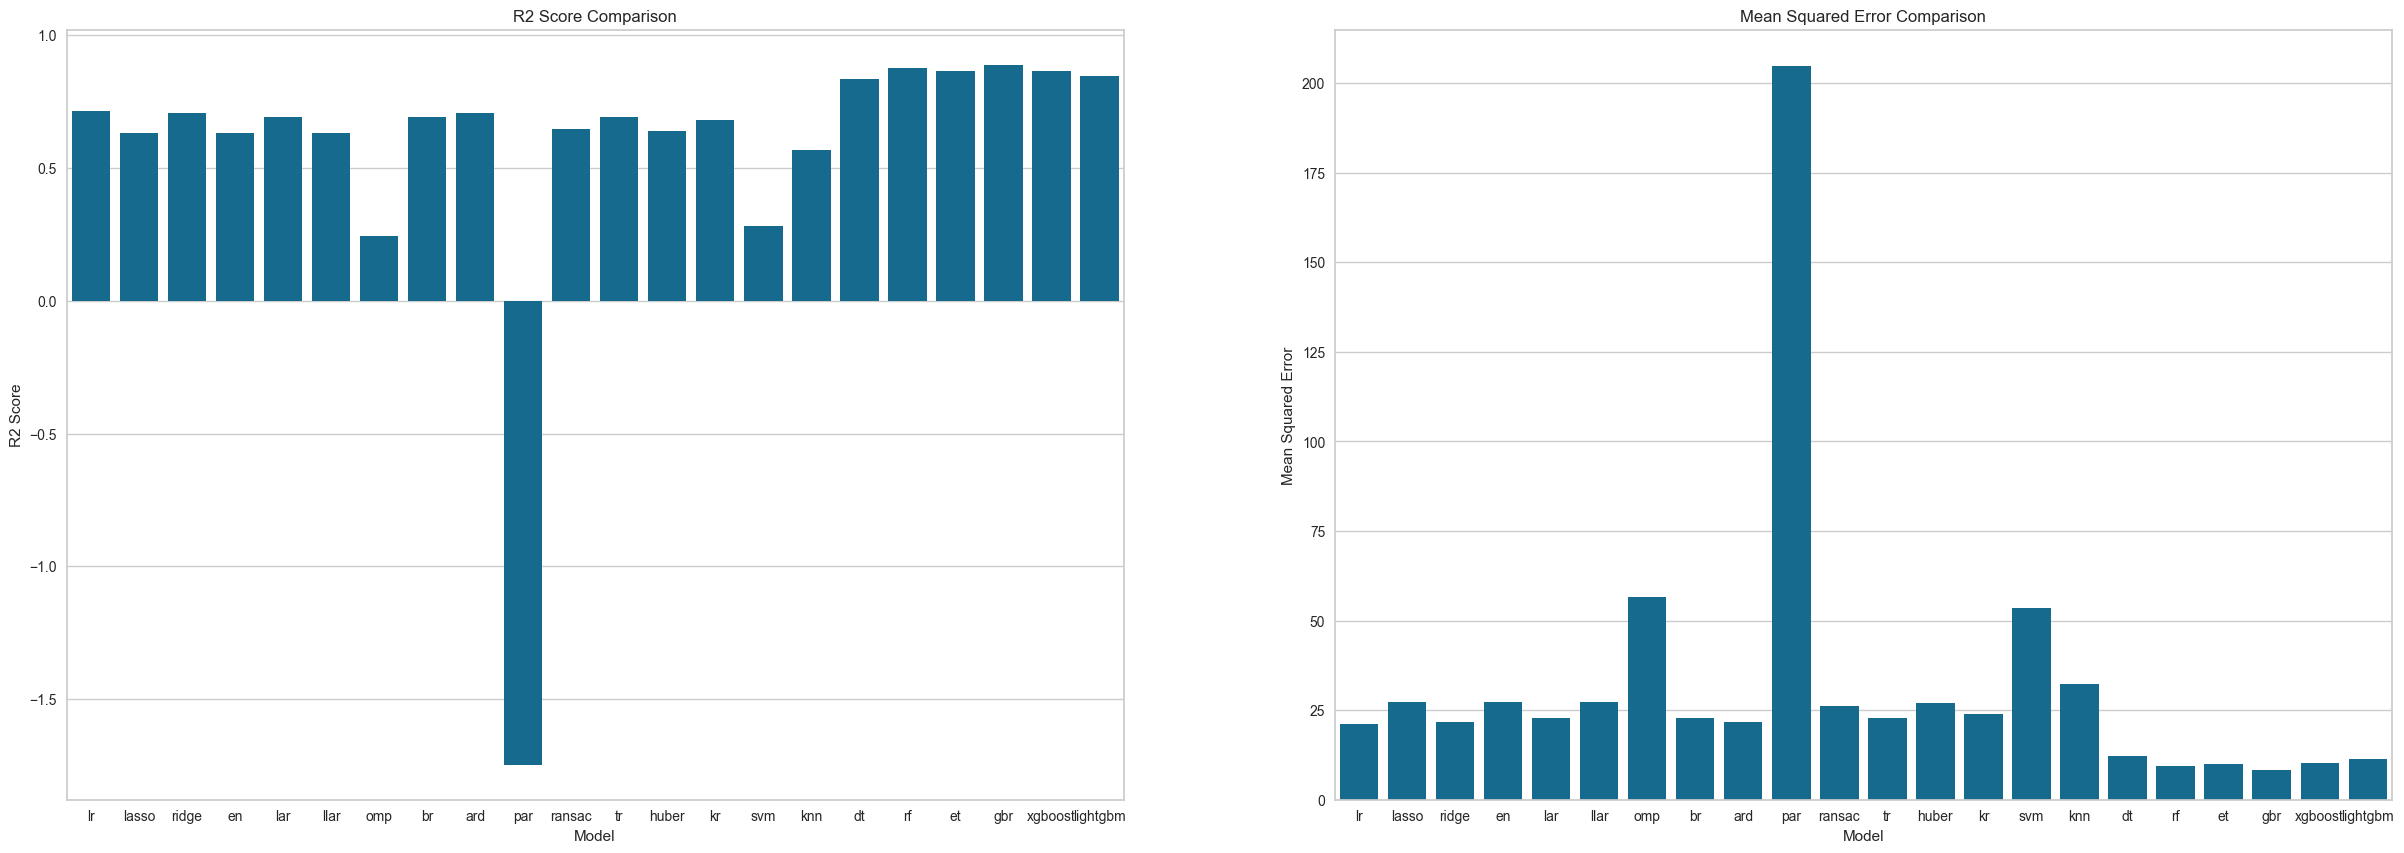

In [182]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('R2 Score Comparison')
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Mean Squared Error', data=results_df)
plt.title('Mean Squared Error Comparison')
plt.show()